# Genetic Variant Classification 

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Numerical Data Distribution**](#Section43)
  - **4.4** [**Pre Profiling Report**](#Section44)

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Essential Features Models**](#Section81)
  - **8.2** [**Fine Tuning of Model**](#Section82)
  - **8.3** [**Final Model**](#Section83)
  
**9.** [**Conclusion**](#Section9)<br>

<a id = Section1></a>

---
# **1. Introduction**

---

**What is a Gene?**<br>
- Gene is a unit of **hereditary information** that occupies a **fixed position on a chromosome**. Genes achieve their effects by directing the synthesis of proteins.
- The **number of genes** in an organism’s genome (the entire set of chromosomes) **varies significantly between species**.



**Chemical structure of genes**<br>
- Genes are composed of **deoxyribonucleic acid (DNA)** except in some viruses, which have genes consisting of a closely related compound called **ribonucleic acid (RNA)**.

**Genetic mutation**<br>
- **Mutations** occur when the **number or order of bases** in a gene is **disrupted**. 
- A nucleotide is the **basic building block of nucleic acids**. RNA and DNA are polymers made of long chains of nucleotides. A nucleotide consists of a sugar molecule (either ribose in RNA or deoxyribose in DNA) attached to a **phosphate group** and a **nitrogen-containing base**.
- **Nucleotides** can be **deleted, doubled, rearranged, or replaced, each alteration having a particular effect.**
- **Mutation** generally has little or no effect, but, when it does alter an organism, **the change may be lethal or cause disease.**


**Variant Classification**<br>
- **After the relevant information has been gathered** and the variant has been thoroughly researched, **a formal variant classification is assigned**.

- A **formal classification** is meant to help **answer two questions** about the **clinical significance of the variant.**

- **From a diagnostic perspective**: Does this variant, in the correct genetic background, provide an explanation for disease in an affected individual?
- **From a predictive perspective**: Narrowly applied to highly penetrant conditions: Is an individual who inherits this variant likely to develop disease?

Below classifications are defined for a gene.
- **Pathogenic**: This variant directly contributes to the development of disease.
- **Likely pathogenic**: There is a high likelihood (greater than 90% certainty) that this variant is disease-causing.
- **Uncertain significance**: There is not enough information at this time to support a more definitive classification of this variant.
- **Likely benign**: This variant is not expected to have a major effect on disease
- **Benign**: This variant does not cause disease.
- **VUS (Variant of uncertain significance)** - Less or nothing is known about this variant.




- **ClinVar** is a public resource containing annotations about human genetic variants. 
- These variants are (usually manually) classified by **clinical laboratories** on a categorical spectrum ranging from **benign, likely benign, uncertain significance, likely pathogenic, and pathogenic**. 
- Variants that have **conflicting classifications** (from laboratory to laboratory) can cause confusion when clinicians or researchers try to interpret whether the **variant has an impact on the disease of a given patient**.

- Conflicting classifications are when **two of any of the following three categories are present for one variant**, two submissions of one category are not considered conflicting.

  - Likely Benign or Benign
  - VUS (Variant of uncertain significance)
  - Likely Pathogenic or Pathogenic

<a id = Section2></a>

---
# **2. Problem Statement**
---

- Most of the times, the **DNA sequence** that makes up the genes of humans has **certain imperfections** that can lead to **incurable diseases**. 
- So if we are able to identify the **gene classifications**; whether the genes are conflicting or not; it would be helpful in **altering the DNA sequence** that makes up a gene permanently, such that the sequence differs from what is found in most people and some **adverse incurable, hereditary diseases can be controlled** in the future generations.

- The objective is to **predict whether a ClinVar variant will have conflicting classifications**. 



**Scenario**:

- A **genetic research company** wants to identify whether the gene information available with them, will be able to **classify a gene as conflicting or not**. This can be done with the help of machine learning algorithms.

- This is presented here as a binary classification problem, where **each record** in the dataset is a **genetic variant**.

- With this, they would be able to work on **genetic mutations**; which will be helpful for generations to come.

- The **target variable** in the dataset that we will be working on is **CLASS**.

|Target Feature|Potential Values|
| :-- | :-- |
|CLASS|0: Not conflicting|
||1: Conflicting|


<a id = Section3></a>

---
# **3. Installing and importing libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [0]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance

<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [0]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a id = Section33></a>
### **3.3 Importing Libraries**

In [0]:
# For Panel Data Analysis
import pandas as pd
import numpy as np
import re
import missingno as msno

#from pandas_profiling import ProfileReport

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  
%matplotlib inline
import seaborn as sns

# For Preprocessing
import sklearn as sk

# For Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# For metrics evaluation
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, plot_confusion_matrix

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

<a id = Section4></a>

---
# **4. Data Acquisition and Description**
---

- This is a gene data based on the various features that are present in the **structure** and the **classification** of a human gene.
- The description of the data is as follows:

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 65188 | 46 | 29 MB |
 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **CHROM** | Chromosome the variant is located on |
|02| **POS** | Position on the chromosome the variant is located on |
|03| **REF** | Reference Allele |
|04| **ALT** | Alternate Allele |
|05| **AF_ESP** | Allele frequencies from GO-ESP |
|06| **AF_EXAC** | Allele frequencies from ExAC |
|07| **AF_TGP** | Allele frequencies from the 1000 genomes project |
|08| **CLNDISDB** | Tag-value pairs of disease database name and identifier |
|09| **CLNDISDBINCL** | For included Variant: Tag-value pairs of disease database name and identifier |
|10| **CLNDN** | ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB |
|11| **CLNDNINCL** | For included Variant : ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB |
|12| **CLNHGVS** | Top-level (primary assembly, alt, or patch) HGVS expression |
|13| **CLNSIGINCL** | Clinical significance for a haplotype or genotype that includes this variant. Reported as pairs of VariationID:clinical significance |
|14| **CLNVC** | Variant Type |
|15| **CLNVI** | The variant's clinical sources reported as tag-value pairs of database and variant identifier |
|16| **MC** | Comma separated list of molecular consequence in the form of Sequence Ontology ID|molecular_consequence |
|17| **ORIGIN** | Allele origin. One or more of the following values may be added:<br><br>1 - germline<br><br>2 - somatic<br><br>4 - inherited<br><br>8 - paternal<br><br>16 - maternal<br><br>32 - de-novo<br><br>64 - biparental<br><br>128 - uniparental<br><br>256 - not-tested<br><br>512 - tested-inconclusive<br><br>1073741824 - other |
|18| **SSR** | Variant Suspect Reason Codes. One or more of the following values may be added:<br><br>0 - unspecified<br><br>1 - Paralog<br><br>2 - byEST<br><br>4 - oldAlign<br><br>8 - Para_EST<br><br>16 - 1kg_failed<br><br>1024 - other |
|19| **CLASS** | The binary representation of the target class. 0 represents no conflicting submissions and 1 represents conflicting submissions |
|20| **Allele** | To calculate the consequence |
|21| **Consequence** | Type of consequence: https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html#consequences |
|22| **IMPACT** | The impact modifier for the consequence type |
|23| **SYMBOL** | Gene Name |
|24| **Feature_type** | Type of feature. Currently one of Transcript, RegulatoryFeature, MotifFeature |
|25| **Feature** | Ensembl stable ID of feature |
|26| **BIOTYPE** | Biotype of transcript or regulatory feature |
|27| **EXON** | The exon number (out of total number) |
|28| **INTRON** | The intron number (out of total number) |
|29| **cDNA_position** | Relative position of base pair in cDNA sequence |
|30| **CDS_position** | Relative position of base pair in coding sequence |
|31| **Protein_position** | Relative position of amino acid in protein |
|32| **Amino_acids** | Only given if the variant affects the protein-coding sequence |
|33| **Codons** | Alternative codons with the variant base in upper case |
|34| **DISTANCE** | Shortest distance from variant to transcript |
|35| **STRAND** | Defined as + (forward) or - (reverse) |
|36| **BAM_EDIT** | Indicates success or failure of edit using BAM file |
|37| **SIFT** | The SIFT prediction and/or score, with both given as prediction(score) |
|38| **PolyPhen** | The PolyPhen prediction and/or score |
|39| **MOTIF_NAME** | The source and identifier of a transcription factor binding profile aligned at this position |
|40| **MOTIF_POS** | The relative position of the variation in the aligned TFBP |
|41| **HIGH_INF_POS** | Flag indicating if the variant falls in a high information position of a transcription factor binding profile (TFBP) |
|42| **MOTIF_SCORE_CHANGE** | The difference in motif score of the reference and variant sequences for the TFBP |
|43| **LoFtool** | Loss of Function tolerance score for loss of function variants: https://github.com/konradjk/loftee |
|44| **MOTIF_POS** | The relative position of the variation in the aligned TFBP |
|45| **CADD_PHRED** | Phred-scaled CADD score |
|46| **CADD_RAW** | Score of the deleteriousness of variants: http://cadd.gs.washington.edu/ |
|47| **BLOSUM62** | Scoring matrix in alignment problems considering protein strings |

In [50]:
g_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Healthcare/Heart%20Disease%20Diagnosis/Data/clinvar_conflicting.csv')
print("Data Shape: ",g_data.shape)

Data Shape:  (65188, 46)


**Examine first 5 rows of the data**

In [51]:
g_data.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [52]:
print('Described Column Length:', len(g_data.describe().columns))

Described Column Length: 15


In [53]:
g_data.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,65188.0,7.757594e+07,5.974051e+07,961.000000,3.254179e+07,5.797021e+07,1.127454e+08,2.476080e+08
AF_ESP,65188.0,1.451052e-02,5.779541e-02,0.000000,0.000000e+00,0.000000e+00,1.200000e-03,4.990000e-01
AF_EXAC,65188.0,1.449218e-02,5.954210e-02,0.000000,0.000000e+00,4.000000e-05,1.230000e-03,4.998900e-01
AF_TGP,65188.0,1.526350e-02,5.952741e-02,0.000000,0.000000e+00,0.000000e+00,1.600000e-03,4.998000e-01
ORIGIN,65188.0,1.342486e+00,5.688772e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.130000e+02
SSR,130.0,2.269231e+00,4.190777e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01
CLASS,65188.0,2.521016e-01,4.342226e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
DISTANCE,108.0,8.257315e+02,1.069363e+03,1.000000,5.550000e+01,4.690000e+02,1.415000e+03,4.759000e+03
STRAND,65174.0,-6.659097e-03,9.999855e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00
MOTIF_POS,2.0,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Observations:**
- There are a lot of missing values in the dataset. Around **30% values** of the entire dataset are **missing**.
- There are **no duplicate rows**.
- The features **REF**, **CLNDISDB**, **Allele** and **ALT** are highly cardinal.
- The variable **ORIGIN** is **highly skewed** to the right.

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [54]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

**Observations:**
- There are **46 features**, out of which **12 are float**, **3 are integer values** and **32 are object type values**.
- There are a **lot of features with missing values** in the dataset.

<a id = Section43></a>
### **4.3 Numerical Data Distribution**

- We shall plot all **numerical features to analyze the distribution** of their past.
- But **before** that we must **extract** all the **numerical** **features** which has been **performed** **below**.

In [55]:
num_feature = []

for i in g_data.columns.values:
  if ((g_data[i].dtype == int) | (g_data[i].dtype == float)):
    num_feature.append(i)
    
print('Total Numerical Features:', len(num_feature))
print('Features:', num_feature)

Total Numerical Features: 15
Features: ['POS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'ORIGIN', 'SSR', 'CLASS', 'DISTANCE', 'STRAND', 'MOTIF_POS', 'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62']


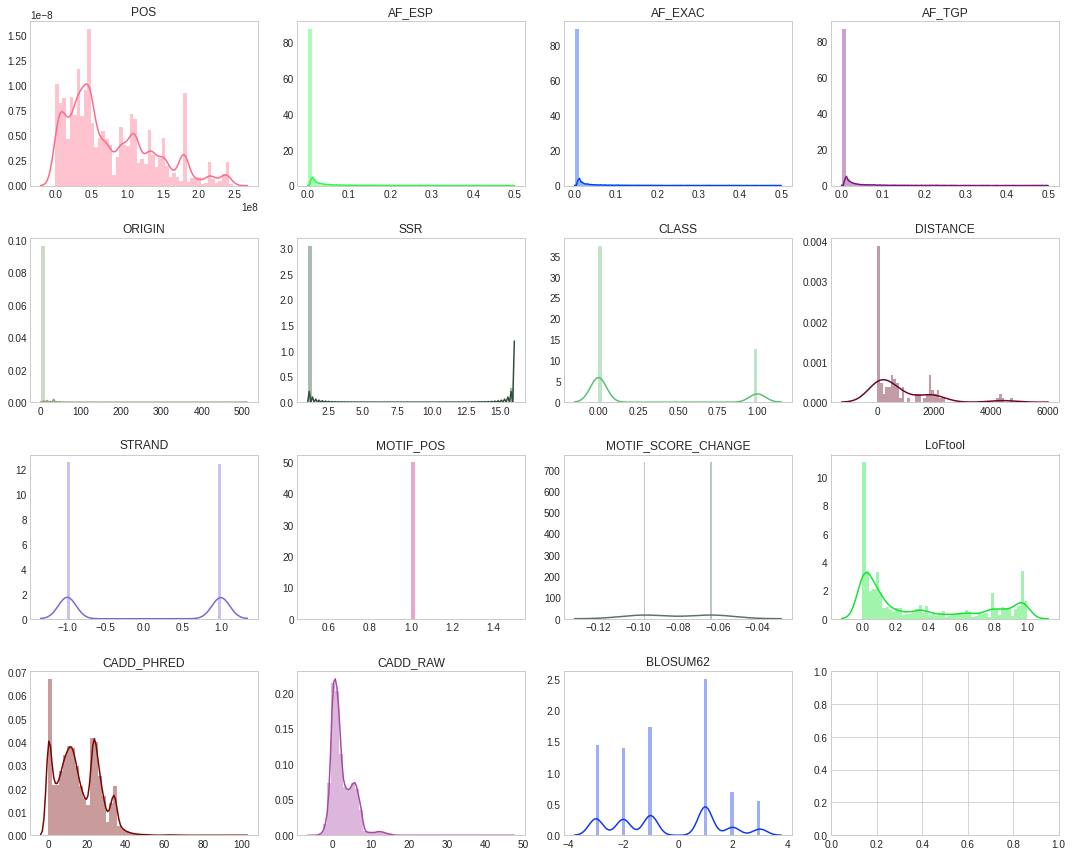

In [56]:
# Creating subplots
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(15, 12))

# Generating random colors based on number of columns
colors = []
for i in range(len(num_feature)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))   
                
for ax, col, color in zip(axes.flat, num_feature, colors):
  sns.distplot(a = g_data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, xlabel = '')
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observations:**
- **Positively Skewed Features:**
  - POS
- **Negatively Skewed Features:**
  - None
- **Normally Skewed Features:**
  - None

<a id = Section44></a>
### **4.4 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [0]:
#profile = ProfileReport(g_data)
#profile.to_file(output_file="Pre Profiling Report.html")
#print('Pre-Profiling Accomplished!')

In [0]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observations:**
- **Missing values:** Around **30% values** of the entire dataset.
- **Duplicate Rows**: **None**
- **Duplicate Columns**: **None**
- **Highly cardinal features**: **REF**, **CLNDISDB**, **Allele**, **ALT**
- **Positively skewed features**: **ORIGIN**

<a id = Section5></a>
# **5. Data Pre-Processing**

<a id = Section52></a>
### **5.1 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

#### **5.1.1 Null Data Identification & Handling**

In [59]:
null_frame = pd.DataFrame(index = g_data.columns.values)
null_frame['Null Frequency'] = g_data.isnull().sum().values
percent = g_data.isnull().sum().values/g_data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65021.00,0.0,65021.00,0.0,65021.00,0.0,37529.00,846.0,0.0,65058.0,0.0,0.0,0.0,0.0,16.00,14.00,14.00,16.00,8893.00,56385.0,8884.00,9955.00,9955.00,10004.00,10004.00,65080.00,14.00,33219.00,40352.0,40392.00,65186.0,65186.0,65186.0,65186.0,4213.00,1092.00,1092.00,39595.00
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.74,0.0,99.74,0.0,99.74,0.0,57.57,1.3,0.0,99.8,0.0,0.0,0.0,0.0,0.02,0.02,0.02,0.02,13.64,86.5,13.63,15.27,15.27,15.35,15.35,99.83,0.02,50.96,61.9,61.96,100.0,100.0,100.0,100.0,6.46,1.68,1.68,60.74


**Observations:**
- **Observation:**

- **Feature**:
  - Problem &rarr; Action Required
- **CLNDISDBINCL**:
  - Missing Information (65021) &rarr; Drop the feature.
  - **Feature**:
  - Missing Information (14) &rarr; Drop the feature.
  - **Feature_type**:
  - Missing Information (14) &rarr; Drop the feature.
  - **SYMBOL**:
  - Missing Information (16) &rarr; Drop the feature.
  - **BIOTYPE**:
  - Missing Information (16) &rarr; Drop the feature.

#### **5.1.2 Zero Data Identification & Handling**

In [60]:
zero_frame = pd.DataFrame(index = g_data.columns.values)
zero_frame['Null Frequency'] = g_data[g_data == 0].count().values
percent = g_data[g_data == 0].count().values / g_data.shape[0]
zero_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
zero_frame.transpose()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
Null Frequency,0.0,0.0,0.0,0.0,35781.00,24047.00,37972.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.00,0.0,48754.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,54.89,36.89,58.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,74.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation**

- **Feature:** 
  - Problem &rarr; Action Required {Reason}
- **CLASS:**
  - Zero data &rarr; 48754 {Target variable}
- **Allele:**
  - Zero data &rarr; None {Feature is categorical}
- **Consequence:**
  - Zero data &rarr; None {Feature is categorical}
- **IMPACT:**
  - Zero data &rarr; None {Feature is categorical}

- The **AF values** which denote allele frequencies, **have values that are 0**; which is discussed later.


**Performing Operations**

In [61]:
g_data = g_data.replace({'':np.nan})
g_data = g_data.dropna(thresh=0.8*len(g_data), axis=1)
g_data.columns

#dropping all columns that  do not play a role in classifying the genes
g_data = g_data.drop(['CLNDISDB','CLNDN','Feature','Consequence','BIOTYPE','SYMBOL','Feature_type','ORIGIN'], axis = 1)
#removing all non numerical values
df_numeric = g_data.drop(['Amino_acids', 'Codons', 'MC', 'CLNHGVS', 'REF', 'ALT', 'CLNVC', 'Allele', 'IMPACT', 'CHROM'], axis = 1)

#converting variables with numeric values listed as strings to numeric
for i in ["Protein_position", "CDS_position", "cDNA_position"]:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors = 'coerce')
    

#converting EXON to numeric values
#The values in EXON are of type 1/1, 1/4, 1/9 and so on. We need to convert these values to numeric numbers.
#The below step is used to perform the same.
df_numeric.EXON.fillna('0', inplace=True)
df_numeric['variant_exon'] = df_numeric.EXON.apply(lambda x: [float(s) for s in re.findall(r'\b\d+\b', x)][0])
df_numeric = df_numeric.drop(["EXON"], axis = 1)

df_numeric.dropna(axis = 0, inplace = True)
df_numeric.head()

,POS,AF_ESP,AF_EXAC,AF_TGP,CLASS,cDNA_position,CDS_position,Protein_position,STRAND,LoFtool,CADD_PHRED,CADD_RAW,variant_exon
6,3328358,0.0000,0.00000,0.0000,0,1858.0,1600.0,534.0,1.0,0.101,0.172,-0.543433,9.0
7,3328659,0.1523,0.13103,0.1060,0,2159.0,1901.0,634.0,1.0,0.101,23.000,3.424422,9.0
8,3347452,0.0000,0.00357,0.0030,1,3562.0,3304.0,1102.0,1.0,0.101,11.360,1.126629,15.0
9,5925304,0.0045,0.00231,0.0058,0,3942.0,3674.0,1225.0,-1.0,0.021,22.100,2.969650,27.0
10,5926503,0.0019,0.00267,0.0010,1,3842.0,3574.0,1192.0,-1.0,0.021,26.100,5.430178,26.0


<a id = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

#### **5.2.1 Identification & Handling of Redundant Rows**

In [62]:
print('Contains Redundant Records?:', g_data.duplicated().any())
print('Duplicate Count:', g_data.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


#### **5.2.2 Identification & Handling of Redundant Features**

- For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values.

In [0]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [64]:
print(duplicate_cols(g_data))

None


**Observation:**

- It turns out that there **are no duplicate columns** in features.

<a id = Section55></a>
### **5.5 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [0]:
#profile = ProfileReport(df)
#profile.to_file(output_file="Post Profiling Report.html")
#print('Post-Profiling Accomplished!')

In [0]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

**Observations:**
- The **missing values** are reduced to **4% values** of the entire dataset.
- We have **dropped CLNDISDB, CLNDN, Feature, Consequence, BIOTYPE, SYMBOL, Feature_type, ORIGIN**, because they do not play a major role in predicting the CLASS of the gene.
- We have removed the following non-numeric features:

   **Amino_acids, Codons, MC, CLNHGVS, REF, ALT, CLNVC, Allele, IMPACT** and **CHROM**
- We have converted the following to numeric values:

   **Protein_position, CDS_position, cDNA_position** and **EXON**.

- Rest there is no change at all in behaviour.

<a id = Section6></a>
# **6. Exploratory Data Analysis**

**Question 1: What is the frequency distribution of the numerical features in the dataset?**

<Figure size 1080x720 with 0 Axes>

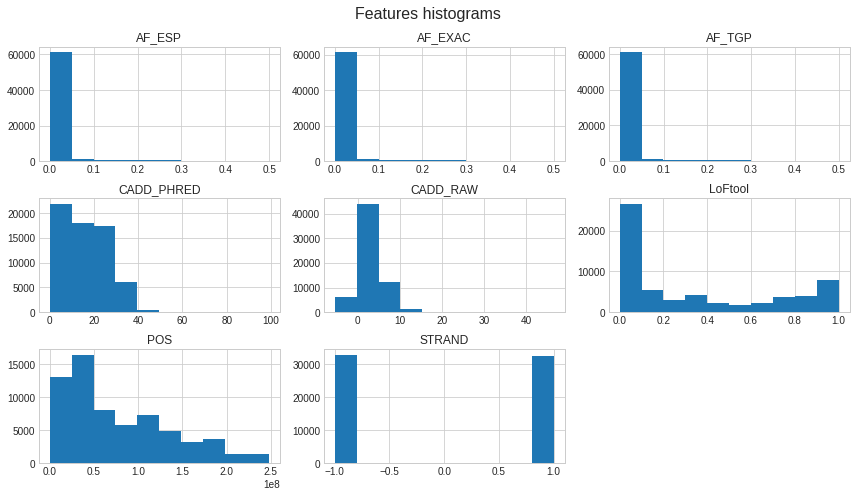

In [67]:
plt.figure(figsize = [15, 10])
g_data.drop('CLASS',axis=1).hist(figsize=(12,7))
plt.suptitle("Features histograms", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**Observations:**
- Feature **POS** is **skewed to the right**.
- **STRAND** has **two values -1 and 1**.


**Question 2: What is the frequency distribution of the target variable in the dataset?**

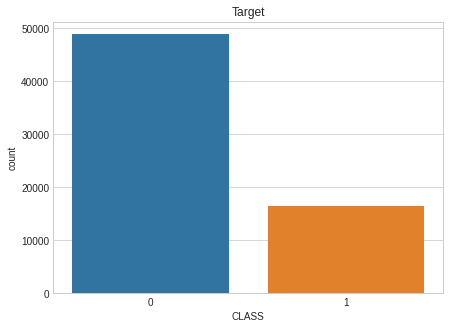

In [68]:
plt.figure(figsize = [7, 5])
sns.countplot(x='CLASS',data=g_data)
plt.title("Target")
plt.show()

**Observations:**
- The **CLASS variable is skewed to the 0 class**. This implies that there are fewer variants with conflicting genes.
- The dataset happens to be **heavily biased towards the non - conflicting genes**.

**Dropping the categorical values, so as to plot the correlation matrix.**

In [0]:
numeric = g_data.drop(['Amino_acids', 'Codons', 'MC', "CLNHGVS", 'REF', 'ALT', 'CLNVC', 'Allele', 'IMPACT', 'CHROM'], axis = 1)

**Question 3: What is the correlation between the features in the dataset?**

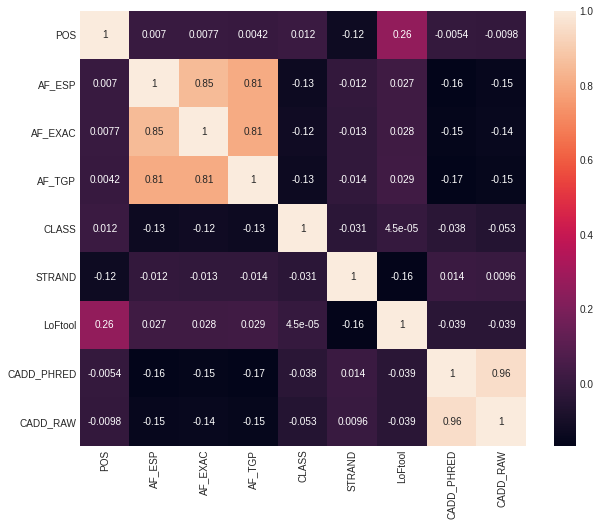

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numeric.corr(), annot=True)
plt.show()

**Observations:**
- **CLASS** follows a **negative correlation** with **all the features except POS**.
- **CADD_PHRED and CADD_RAW** follow a **positive correlation with each other**.
- **AF_ESP, AF_EXAC** and **AF_TGP** follow a **positive correlation with each other**.

**Question 4: What are the frequencies of conflicting and non-conflicting genes based on the chromosome the variant is located on?**

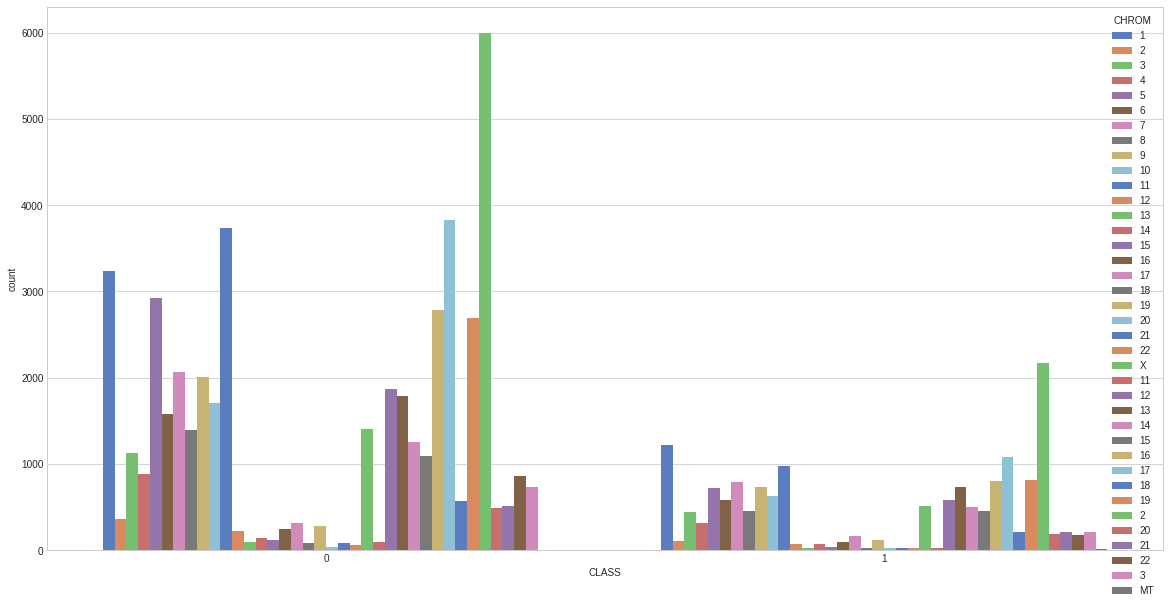

In [71]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(x= 'CLASS', data = g_data, hue = 'CHROM', palette='muted')

**Observations:**
- In the label of the graph **"X"** refers to the values of 0, i.e, **non-conflicting classifications**.
- The data appears to be **heavily biased** towards the **non-conflicting genes**.
- **CHROM == 2** has the **maximum bias** for **non-conflicting genes**.

**Question 5 : What is the frequency of the impact modifier of the consequence type?**

**Note:** **"IMPACT" feature** explains the impact modifier of the consequence type in a conflicting or a non-conflicting gene. 

It has **4 classes**:
- **MODERATE**
- **MODIFIER**
- **LOW**
- **HIGH**


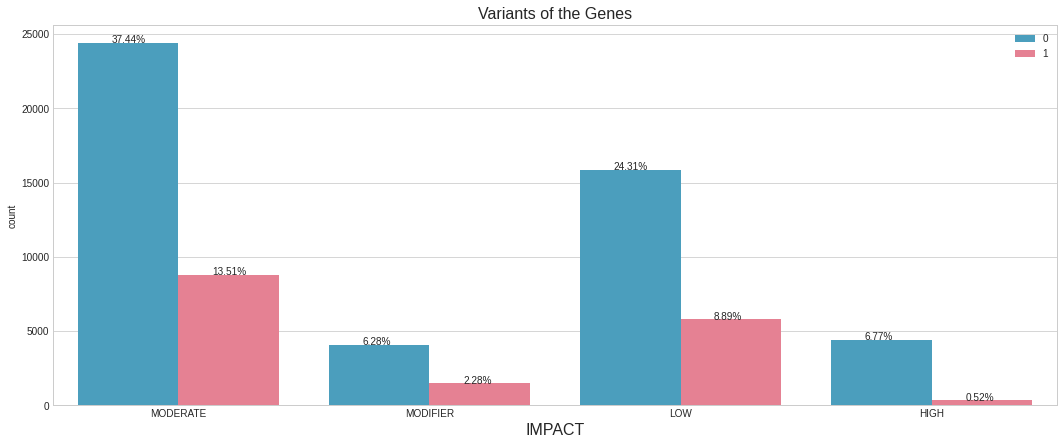

In [72]:
figure = plt.figure(figsize = [18, 7])

ax = sns.countplot(x = 'IMPACT', hue = 'CLASS', data = g_data, palette = ['#38A7D0', '#F67088'])
total = g_data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('IMPACT', size = 16)
plt.legend(labels = ['0', '1'])
plt.title('Variants of the Genes', size = 16)
plt.show()

**Observations:**
- **MODERATE impact** has the **highest** number of **conflicting genes**.
- **HIGH impact** has the **lowest** number of **conflicting genes**.


**Question 6**: Which **variants of the genes** have the **most number of conflicting genes**?

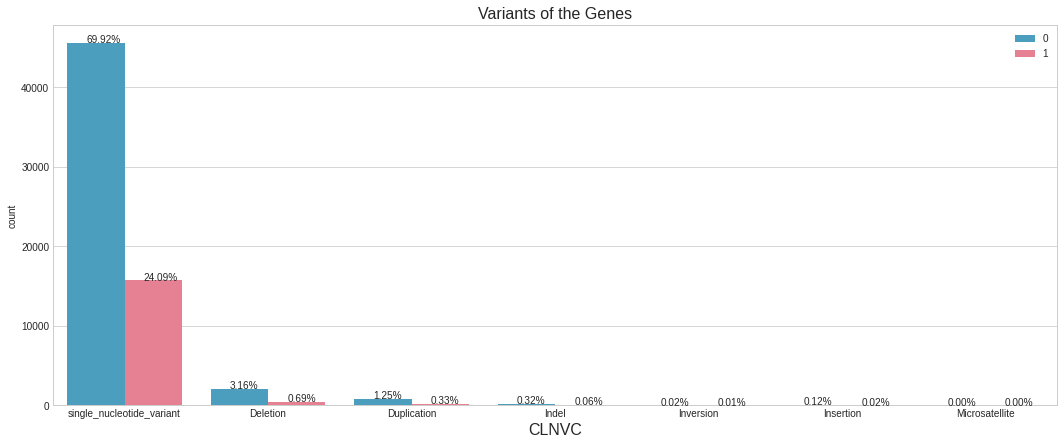

In [73]:
figure = plt.figure(figsize = [18, 7])

ax = sns.countplot(x = 'CLNVC', hue = 'CLASS', data = g_data, palette = ['#38A7D0', '#F67088'])
total = g_data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('CLNVC', size = 16)
plt.legend(labels = ['0', '1'])
plt.title('Variants of the Genes', size = 16)
plt.show()

**Observations:**
- The **maximum number of conflicting genes** lie in the **single nucleotide variant**.
- **Insertion, inversion and microsatellite gene variant** have approximately **no conflicting genes**.
- **Indel gene variant** has the **least number of conflicting genes**.

**Question 7:** How many **conflicting genes** are present in the **final matured RNA version of the gene**?

**Note:** An **exon** is any part of a gene that will encode a part of the **final mature RNA produced by that gene after introns have been removed by RNA splicing**. The term exon refers to both the DNA sequence within a gene and to the corresponding sequence in RNA transcripts. In **RNA splicing**, introns are removed and **exons are covalently joined to one another as part of generating the mature messenger RNA**.

(-0.5, 20.5)

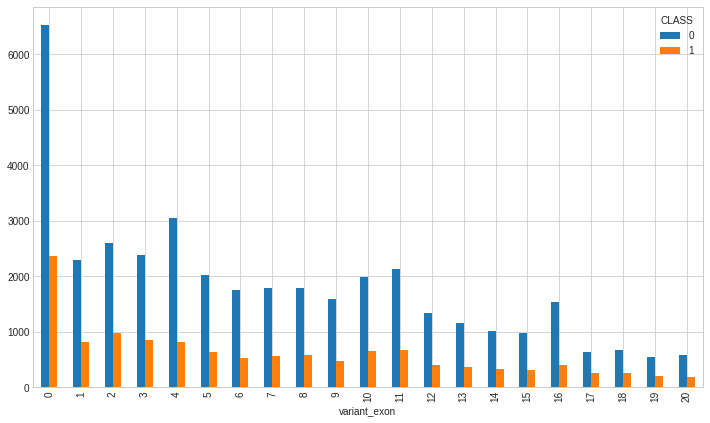

In [74]:
g_data.EXON.fillna('0', inplace=True)
g_data['variant_exon'] = g_data.EXON.apply(lambda x: [int(s) for s in re.findall(r'\b\d+\b', x)][0])

en = pd.crosstab(g_data['variant_exon'], g_data['CLASS'])
en.plot.bar(figsize=(12, 7))
plt.xlim(-0.5, 20.5)

**Observations:**
- Variant **exon = 0** represents that the **variant is located in the intron**.
- **Intron variants** are **more conflicting** than the **exon variants**.

**Question 8: What is the possibility of conflicting/non-conflicting genes in forward and reverse strands in a gene?**

**Note:** Transcription is when RNA is made from DNA. The information is copied from one molecule to the other. **The DNA sequence is copied by a special enzyme** called RNA polymerase **to make a matching RNA strand**.

Wherever a gene exists on a DNA molecule, **one strand is the coding strand** and the **other is the noncoding strand**.

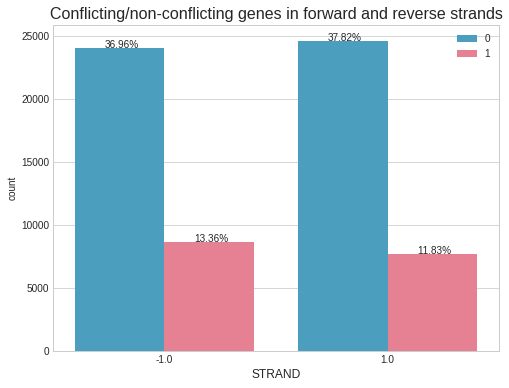

In [75]:
figure = plt.figure(figsize = [8, 6])

ax = sns.countplot(x = 'STRAND', hue = 'CLASS', data = g_data, palette = ['#38A7D0', '#F67088'])
total = g_data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('STRAND', size = 12)
plt.legend('Class',labels = ['0', '1'])
plt.title('Conflicting/non-conflicting genes in forward and reverse strands', size = 16)
plt.show()

**Observations:**
- Possibility of **conflicting genes in reverse strands** is approximately **1.18 times than a forward strand**.

**Question 9**: What do **Allele frequency values** indicate?

**Note:** **Allele frequency** (also called gene frequency) is the term used to describe the **fraction of gene copies** that are of a **particular allele in a defined population**.

Text(0.5, 1.0, 'Frequency of the AF features')

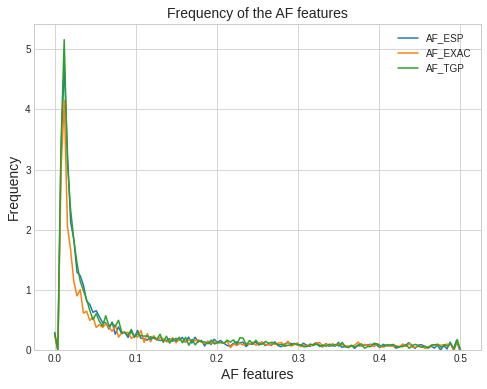

In [76]:
plt.figure(figsize = (8,6))
sns.kdeplot(g_data.AF_ESP, label="AF_ESP")
sns.kdeplot(g_data.AF_EXAC, label="AF_EXAC")
sns.kdeplot(g_data.AF_TGP, label="AF_TGP")
plt.xlabel('AF features', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency of the AF features', size = 14)

**Observations:**
- Most of the **AF values are low** which states that they have **less impact on conflicting genes**.

**Question 10:** What do the **CADD values** indicate?

**Note:** **CADD** - **Combined Annotation Dependent Depletion**

These are measures of **variant deleteriousness** that can effectively prioritize **causal variants in genetic analyses**, particularly highly penetrant contributors to severe disorders.

Text(0.5, 1.0, 'Frequency of the CADD features')

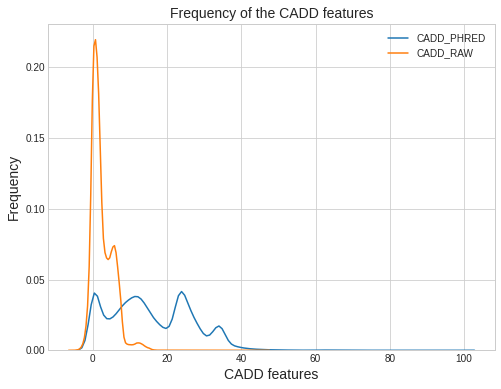

In [77]:
plt.figure(figsize = (8,6))
sns.kdeplot(g_data.CADD_PHRED, label="CADD_PHRED")
sns.kdeplot(g_data.CADD_RAW, label="CADD_RAW")
plt.xlabel('CADD features', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency of the CADD features', size = 14)

**Observations**:
- **CADD_RAW has a higher impact** on the number of conflicting genes as **compared to CADD_PHRED**.

**Question 11: What does the loss function depict about conflicting and non-conflicting genes?** 

**Note:** Loss-of-function genetic variants are frequently associated with severe underlying loss-of-function genetic variation

Text(0.5, 1.0, 'Frequency of the LoFtool feature')

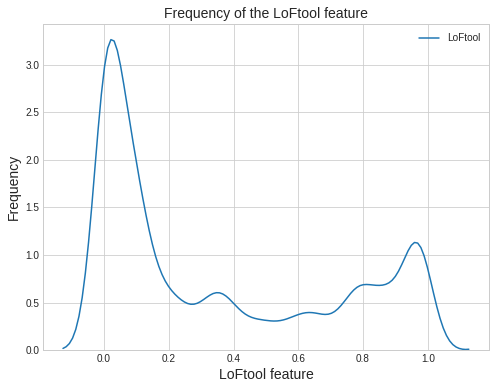

In [78]:
plt.figure(figsize = (8,6))
sns.kdeplot(g_data.LoFtool, label="LoFtool")
plt.xlabel('LoFtool feature', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency of the LoFtool feature', size = 14)

**Observations:**
- Value of **loss function ranges from 0 to 1**.
- Loss function has lower values and therefore has **less impact on conflicting genes**.

<a id = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

- We will **store the proportion** of conflicting and non-conflicting genes.
- And **finally** we will **split** our **data** for the **model development**.

<a id = Section73></a>
### **7.1 Data Preparation**

- **Calculating and storing the proportion of conflicting/non-conflicting genes**.

In [79]:
g = g_data.groupby('CLASS').size()
proportion_conflicting = g[1]/g.sum()
print(g)
print("The fraction of classifications that are conflicting is {}".format(proportion_conflicting))

CLASS
0    48754
1    16434
dtype: int64
The fraction of classifications that are conflicting is 0.2521016137939498


<a id = Section73></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [0]:
#splitting data into training and test sets
from sklearn.model_selection import train_test_split
df_numeric_predictors = df_numeric.drop(["CLASS"], axis = 1)
df_numeric_outcome = df_numeric["CLASS"]
xtrain, xtest, ytrain, ytest = train_test_split(df_numeric_predictors, df_numeric_outcome, test_size=0.33, random_state=42)

In [81]:
print('Training Data Shape:', xtrain.shape, ytrain.shape)
print('Testing Data Shape:', xtest.shape, ytest.shape)

Training Data Shape: (33104, 12) (33104,)
Testing Data Shape: (16306, 12) (16306,)


**Observation:**

- Now that we have split out our data, we are **good to go with model development**.

<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop different models**.
- Then we will **compare the results** obtained from them and make our observations.
- For **evaluation purpose** we will plot **precision and recall** for **each estimator** for which a **custom function** is made below .
- We also use **confusion matrix** for **validation** purpose.
- **Remember** that **we want generalize results** i.e. same results or error in testing data as that of training data.
- **At the end** we will **tune** our **models if required**.

**Custom function for precision and recall.**

In [0]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

<a id = Section81></a>
## **8.1 Essential Features Models**

<a id = Section811></a>
### **8.1.1 Logistic Regression**

In [0]:
log  = LogisticRegression(random_state = 42)
log.fit(xtrain, ytrain)

y_train_pred_count = log.predict(xtrain)
y_test_pred_count = log.predict(xtest)

y_train_pred_proba = log.predict_proba(xtrain)
y_test_pred_proba = log.predict_proba(xtest)

In [84]:
logistic_report_train = classification_report(ytrain, y_train_pred_count)
logistic_report_test = classification_report(ytest, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     24811
           1       0.00      0.00      0.00      8293

    accuracy                           0.75     33104
   macro avg       0.37      0.50      0.43     33104
weighted avg       0.56      0.75      0.64     33104

                    Testing Report           
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     12180
           1       0.00      0.00      0.00      4126

    accuracy                           0.75     16306
   macro avg       0.37      0.50      0.43     16306
weighted avg       0.56      0.75      0.64     16306



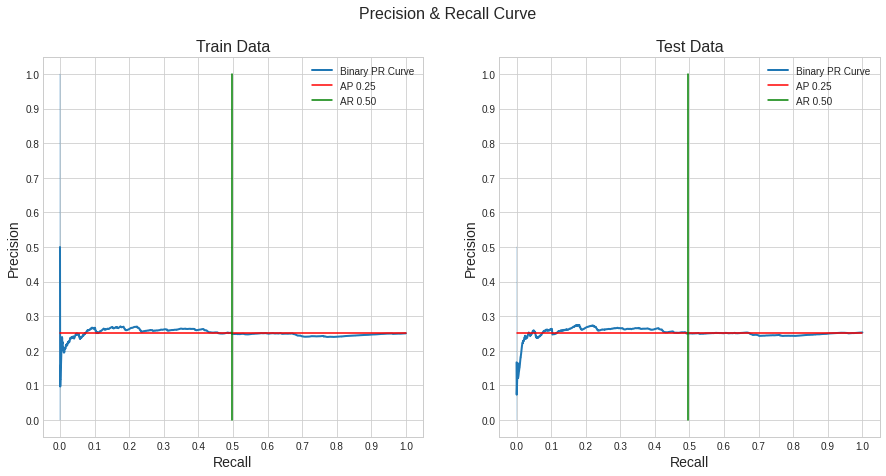

In [85]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = ytrain, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = ytest, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 25%** while **for testing data it is 25%**.
- The **average recall** for **training data is 50%** while **for testing data it is 50%**.

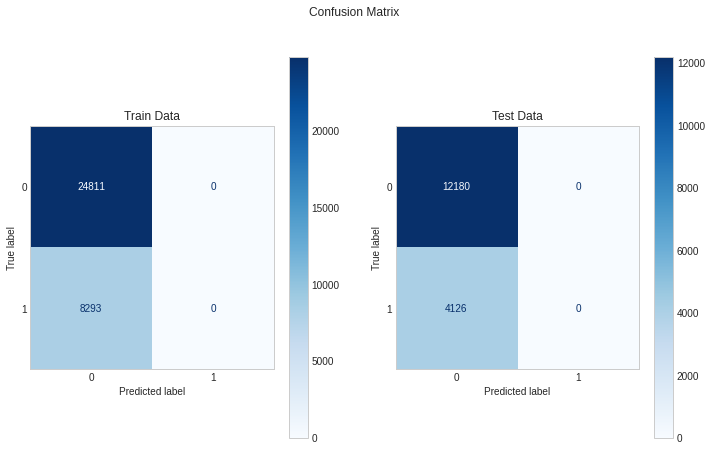

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(12, 7))
plot_confusion_matrix(estimator = log, X = xtrain, y_true = ytrain, values_format = '.5g', cmap = 'Blues', ax = ax1)
plot_confusion_matrix(estimator = log, X = xtest, y_true = ytest, values_format = '.5g', cmap = 'Blues', ax = ax2)
ax1.set_title(label = 'Train Data', size = 12)
ax2.set_title(label = 'Test Data', size = 12)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 12)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **24811 instances correctly** for **negative class** while **0 instances** were predicted **correctly** for **positive class**.
  - Model **identified 8293 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **12180 instances correctly** for **negative class** while **0 instances** were predicted **correctly** for **positive class**.
  - Model **identified 4126 instance negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

<a id = Section812></a>
### **8.1.2 Ada Boost Classifier**

In [0]:
abc  = AdaBoostClassifier()
abc.fit(xtrain, ytrain)

y_train_pred_count = abc.predict(xtrain)
y_test_pred_count = abc.predict(xtest)

y_train_pred_proba = abc.predict_proba(xtrain)
y_test_pred_proba = abc.predict_proba(xtest)

In [88]:
abc_report_train = classification_report(ytrain, y_train_pred_count)
abc_report_test = classification_report(ytest, y_test_pred_count)
print('                    Training Report          ')
print(abc_report_train)
print('                    Testing Report           ')
print(abc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     24811
           1       0.53      0.16      0.24      8293

    accuracy                           0.75     33104
   macro avg       0.65      0.56      0.55     33104
weighted avg       0.71      0.75      0.70     33104

                    Testing Report           
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     12180
           1       0.55      0.16      0.25      4126

    accuracy                           0.75     16306
   macro avg       0.66      0.56      0.55     16306
weighted avg       0.71      0.75      0.70     16306



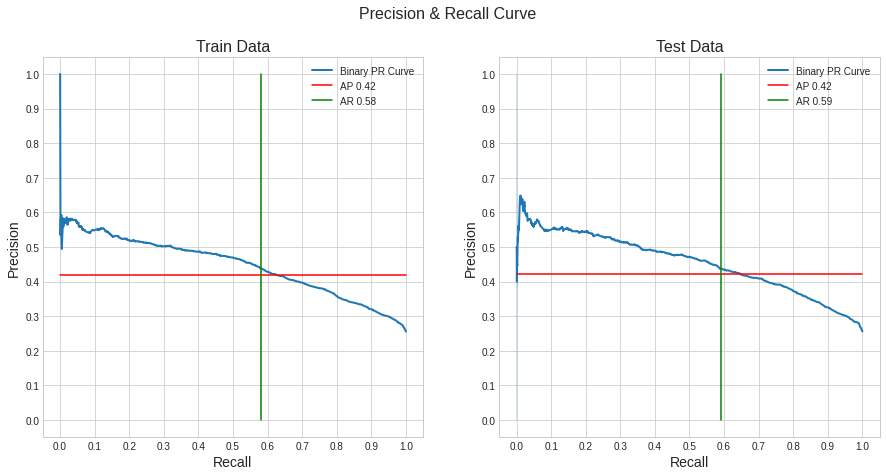

In [89]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = ytrain, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = ytest, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 42%** while **for testing data it is 42%**.
- The **average recall** for **training data is 58%** while **for testing data it is 59%**.

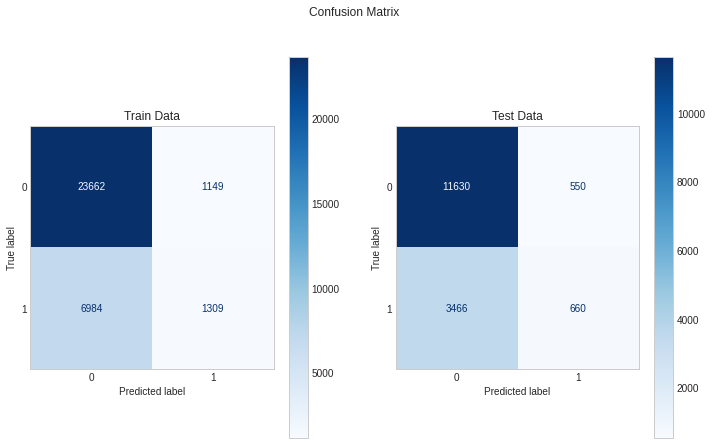

In [90]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(12, 7))
plot_confusion_matrix(estimator = abc, X = xtrain, y_true = ytrain, values_format = '.5g', cmap = 'Blues', ax = ax1)
plot_confusion_matrix(estimator = abc, X = xtest, y_true = ytest, values_format = '.5g', cmap = 'Blues', ax = ax2)
ax1.set_title(label = 'Train Data', size = 12)
ax2.set_title(label = 'Test Data', size = 12)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 12)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **23662 instances correctly** for **negative class** while **1309 instances** were predicted **correctly** for **positive class**.
  - Model **identified 6984 instances negative but in actual** they **were positive**.
  - Model **identified 1149 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **11630 instances correctly** for **negative class** while **660 instances** were predicted **correctly** for **positive class**.
  - Model **identified 3466 instance negative but in actual** they **were positive**.
  - Model **identified 550 instances positive but in actual** they **were negative**.

<a id = Section813></a>
### **8.1.3 k-Nearest Neighbor Classifier**

In [0]:
knc  = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

y_train_pred_count = knc.predict(xtrain)
y_test_pred_count = knc.predict(xtest)

y_train_pred_proba = knc.predict_proba(xtrain)
y_test_pred_proba = knc.predict_proba(xtest)

In [92]:
knc_report_train = classification_report(ytrain, y_train_pred_count)
knc_report_test = classification_report(ytest, y_test_pred_count)
print('                    Training Report          ')
print(knc_report_train)
print('                    Testing Report           ')
print(knc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     24811
           1       0.65      0.35      0.46      8293

    accuracy                           0.79     33104
   macro avg       0.73      0.65      0.66     33104
weighted avg       0.77      0.79      0.77     33104

                    Testing Report           
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     12180
           1       0.35      0.19      0.24      4126

    accuracy                           0.70     16306
   macro avg       0.55      0.53      0.53     16306
weighted avg       0.66      0.70      0.67     16306



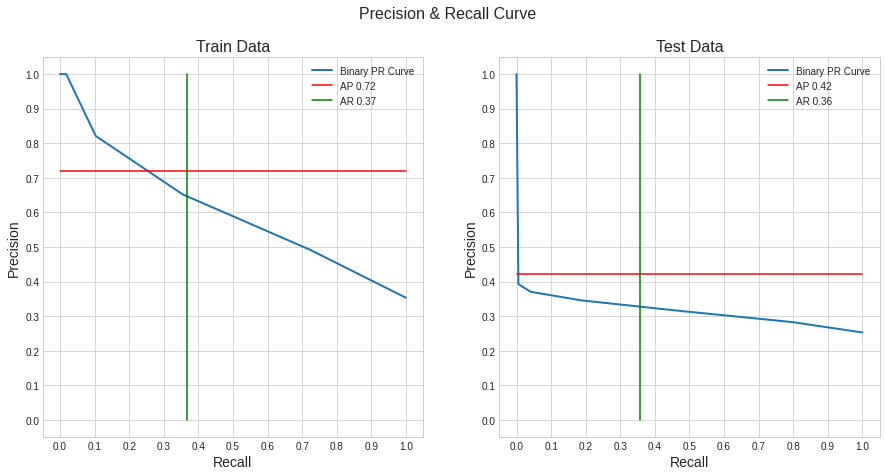

In [93]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = ytrain, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = ytest, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 72%** while **for testing data it is 42%**.
- The **average recall** for **training data is 37%** while **for testing data it is 36%**.

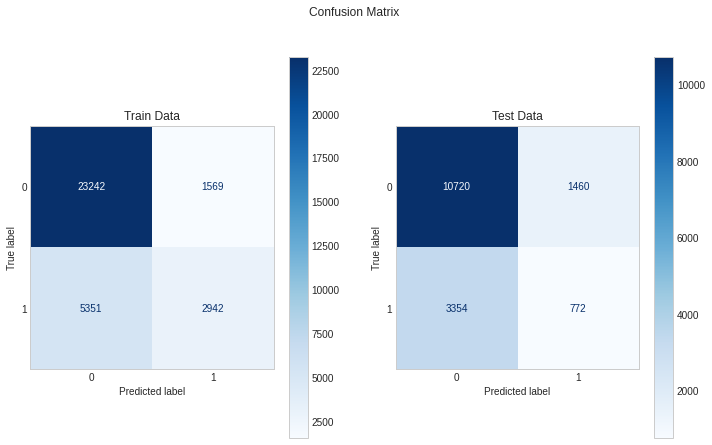

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(12, 7))
plot_confusion_matrix(estimator = knc, X = xtrain, y_true = ytrain, values_format = '.5g', cmap = 'Blues', ax = ax1)
plot_confusion_matrix(estimator = knc, X = xtest, y_true = ytest, values_format = '.5g', cmap = 'Blues', ax = ax2)
ax1.set_title(label = 'Train Data', size = 12)
ax2.set_title(label = 'Test Data', size = 12)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 12)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **23242 instances correctly** for **negative class** while **2942 instances** were predicted **correctly** for **positive class**.
  - Model **identified 5351 instances negative but in actual** they **were positive**.
  - Model **identified 1569 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **10720 instances correctly** for **negative class** while **772 instances** were predicted **correctly** for **positive class**.
  - Model **identified 3354 instance negative but in actual** they **were positive**.
  - Model **identified 1460 instances positive but in actual** they **were negative**.

<a id = Section814></a>
### **8.1.4 Gradient Boosting Classifier**

In [0]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)

y_train_pred_count = gbc.predict(xtrain)
y_test_pred_count = gbc.predict(xtest)

y_train_pred_proba = gbc.predict_proba(xtrain)
y_test_pred_proba = gbc.predict_proba(xtest)

In [96]:
gbc_report_train = classification_report(ytrain, y_train_pred_count)
gbc_report_test = classification_report(ytest, y_test_pred_count)
print('                    Training Report          ')
print(gbc_report_train)
print('                    Testing Report           ')
print(gbc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     24811
           1       0.62      0.20      0.30      8293

    accuracy                           0.77     33104
   macro avg       0.70      0.58      0.58     33104
weighted avg       0.74      0.77      0.72     33104

                    Testing Report           
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     12180
           1       0.57      0.18      0.27      4126

    accuracy                           0.76     16306
   macro avg       0.67      0.57      0.56     16306
weighted avg       0.72      0.76      0.71     16306



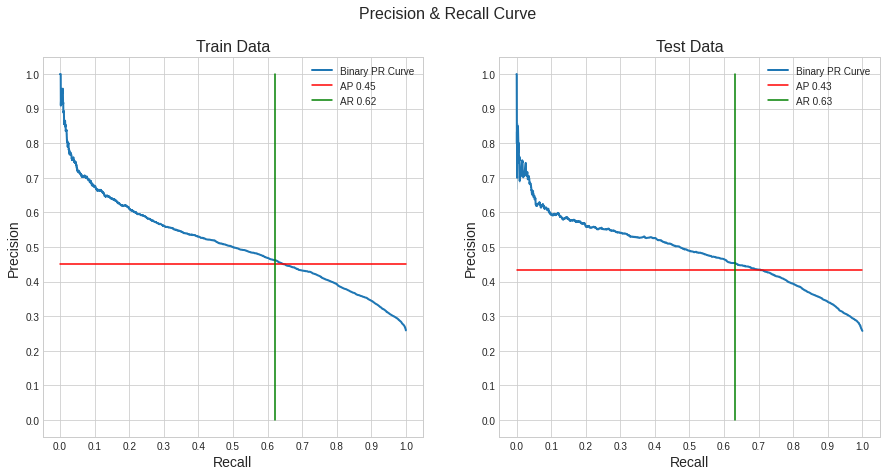

In [97]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = ytrain, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = ytest, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 45%** while **for testing data it is 43%**.
- The **average recall** for **training data is 62%** while **for testing data it is 63%**.

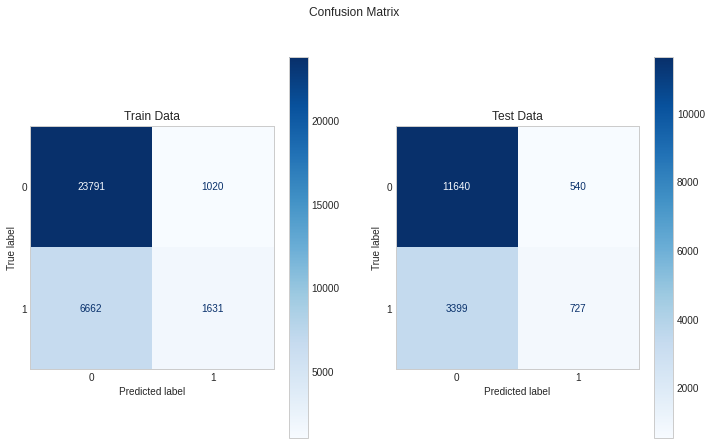

In [98]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(12, 7))
plot_confusion_matrix(estimator = gbc, X = xtrain, y_true = ytrain, values_format = '.5g', cmap = 'Blues', ax = ax1)
plot_confusion_matrix(estimator = gbc, X = xtest, y_true = ytest, values_format = '.5g', cmap = 'Blues', ax = ax2)
ax1.set_title(label = 'Train Data', size = 12)
ax2.set_title(label = 'Test Data', size = 12)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 12)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **23791 instances correctly** for **negative class** while **1631 instances** were predicted **correctly** for **positive class**.
  - Model **identified 6662 instances negative but in actual** they **were positive**.
  - Model **identified 1020 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **11640 instances correctly** for **negative class** while **727 instances** were predicted **correctly** for **positive class**.
  - Model **identified 3399 instance negative but in actual** they **were positive**.
  - Model **identified 540 instances positive but in actual** they **were negative**.

<a id = Section815></a>
### **8.1.5 Decision Tree Classifier**

In [0]:
dtc  = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

y_train_pred_count = dtc.predict(xtrain)
y_test_pred_count = dtc.predict(xtest)

y_train_pred_proba = dtc.predict_proba(xtrain)
y_test_pred_proba = dtc.predict_proba(xtest)

In [100]:
dtc_report_train = classification_report(ytrain, y_train_pred_count)
dtc_report_test = classification_report(ytest, y_test_pred_count)
print('                    Training Report          ')
print(dtc_report_train)
print('                    Testing Report           ')
print(dtc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24811
           1       1.00      1.00      1.00      8293

    accuracy                           1.00     33104
   macro avg       1.00      1.00      1.00     33104
weighted avg       1.00      1.00      1.00     33104

                    Testing Report           
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     12180
           1       0.39      0.39      0.39      4126

    accuracy                           0.69     16306
   macro avg       0.59      0.59      0.59     16306
weighted avg       0.69      0.69      0.69     16306



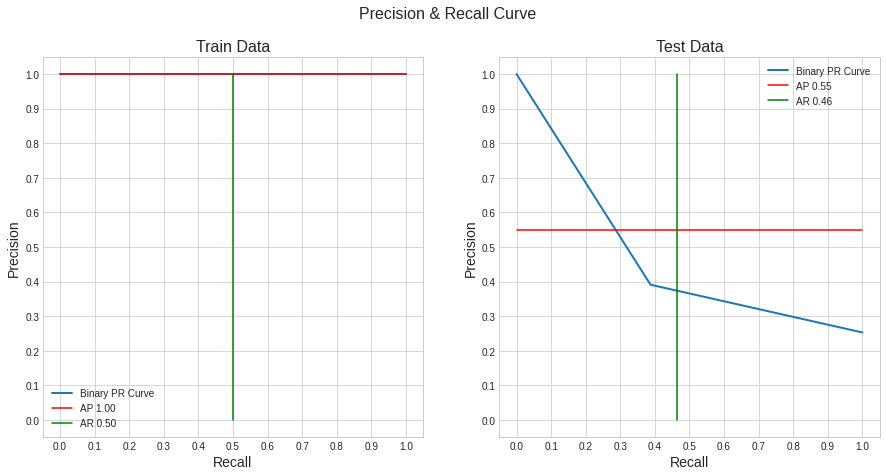

In [101]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = ytrain, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = ytest, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 100%** while **for testing data it is 55%**.
- The **average recall** for **training data is 50%** while **for testing data it is 47%**.

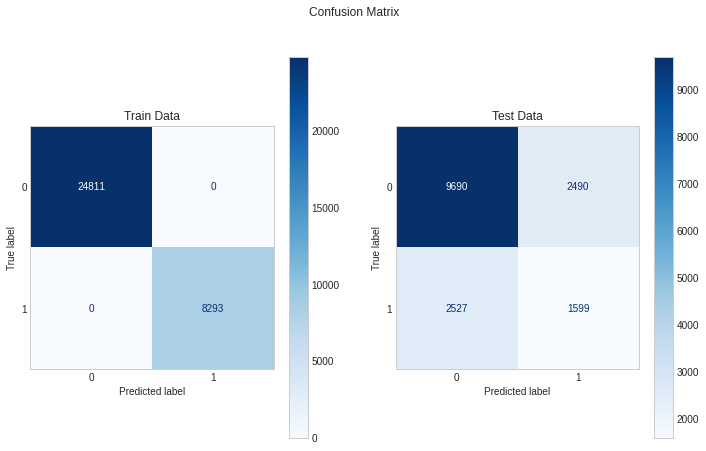

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(12, 7))
plot_confusion_matrix(estimator = dtc, X = xtrain, y_true = ytrain, values_format = '.5g', cmap = 'Blues', ax = ax1)
plot_confusion_matrix(estimator = dtc, X = xtest, y_true = ytest, values_format = '.5g', cmap = 'Blues', ax = ax2)
ax1.set_title(label = 'Train Data', size = 12)
ax2.set_title(label = 'Test Data', size = 12)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 12)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **24811 instances correctly** for **negative class** while **8293 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **9722 instances correctly** for **negative class** while **1630 instances** were predicted **correctly** for **positive class**.
  - Model **identified 2496 instance negative but in actual** they **were positive**.
  - Model **identified 2458 instances positive but in actual** they **were negative**.


---
<a id = Section8></a>

# **8. Conclusion**
---

**Observations:**

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** related to the variation in genes and their classification as conflicting and non-conflicting.

- We **investigated in depth about the features** which to **retain** and which to **discard**.
  
- We **performed model development** with **variety** of **algorithms** and at **final stage Gradient Boosting Classifier outperformed all the models** because of **low error**.

- This **final model** now can **help us** in **identifying** whether a **ClinVar variant will have conflicting classifications**.